In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

We now load the dataset.

In [ ]:
data = pd.read_csv('/content/netflix1.csv')

In [ ]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


Next we check for missing values in the data.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [ ]:
data.shape

(8790, 10)

Drop any duplicates if they exist.

In [ ]:
data = data.drop_duplicates()

Find unique types of shows in data and then plot it.

In [ ]:
data['type'].value_counts()

,count
type,
Movie,6126
TV Show,2664


Text(0.5, 1.0, 'Distribution of content by Type')

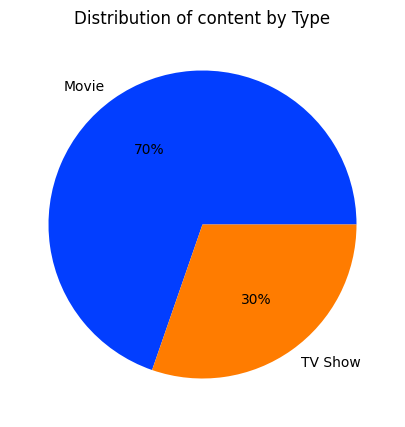

In [ ]:
plt.figure(figsize = (10, 5))

freq=data['type'].value_counts()
palette_color = sns.color_palette('bright')
plt.pie(freq, labels=['Movie', 'TV Show'],colors = palette_color, autopct='%.0f%%')

plt.title('Distribution of content by Type')



Text(0, 0.5, 'Genre')

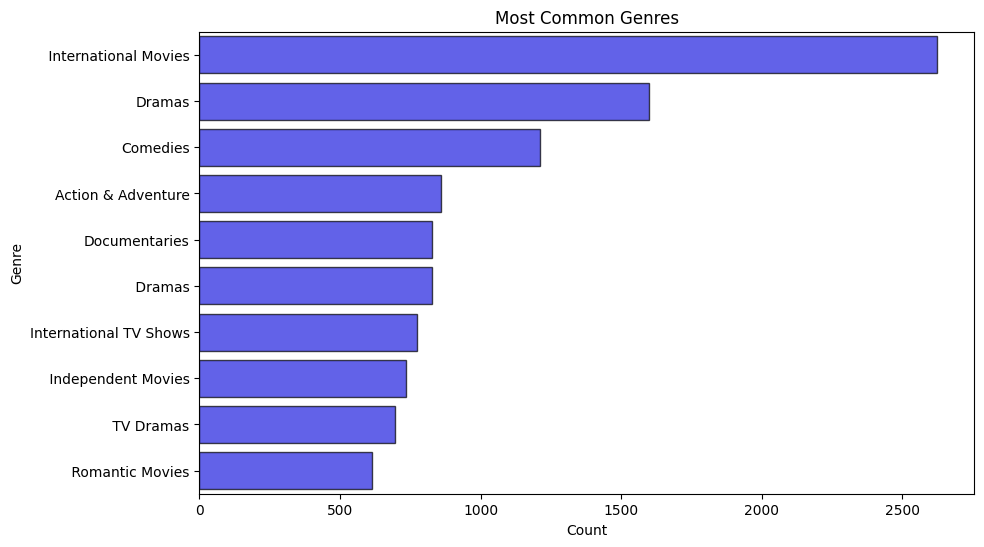

In [ ]:
#Most common genres

data['genres'] = data['listed_in'].apply(lambda x: x.split(','))

all_genres = sum(data['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10)

plt.figure(figsize = (10, 6))

sns.barplot(x = genre_counts.values, y = genre_counts.index, color = 'blue', edgecolor = 'black', alpha = 0.7)
plt.title('Most Common Genres')
plt.xlabel('Count')
plt.ylabel('Genre')




Text(0.5, 0, 'Count')

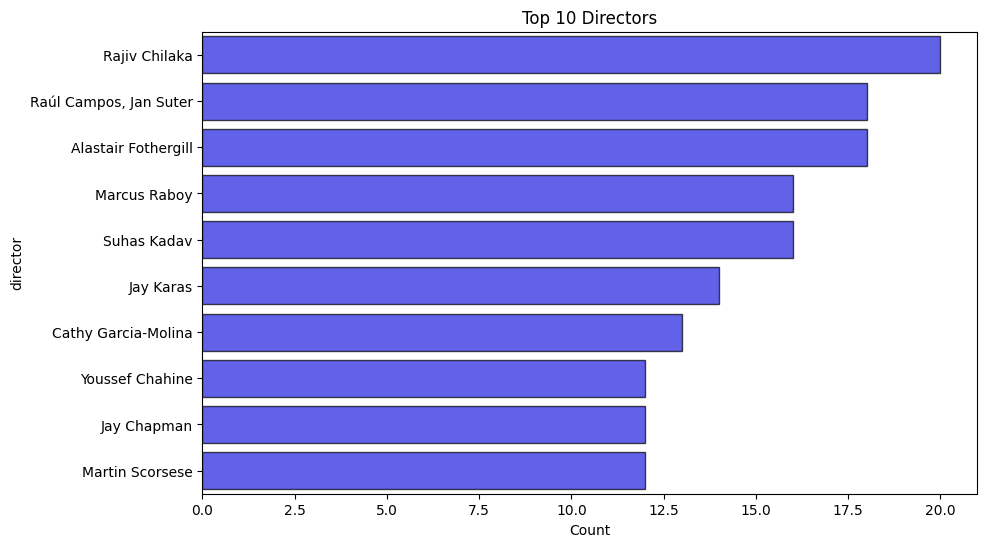

In [ ]:
#top 10 directors

filtered_data = data[data['director'] != 'Not Given'] #excludes where Director name is not mentioned
top_directors = filtered_data['director'].value_counts().head(10)

plt.figure(figsize = (10, 6))

sns.barplot(x = top_directors.values, y = top_directors.index, color = 'blue', edgecolor = 'black', alpha = 0.7)
plt.title('Top 10 Directors')
plt.xlabel('Count')

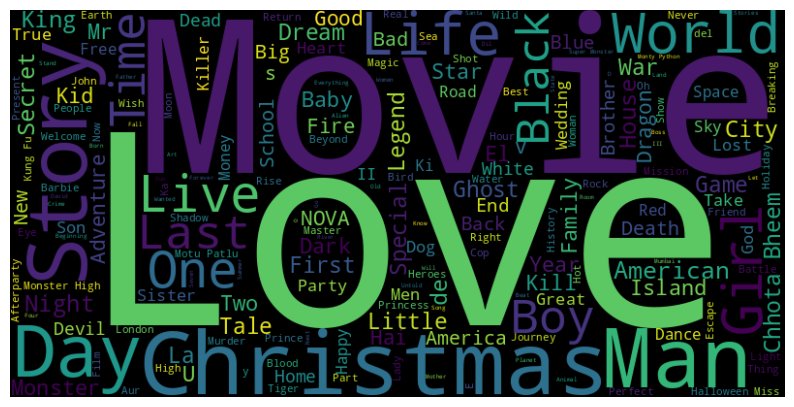

In [ ]:
# Generate word cloud
movie_titles = data[data['type'] == 'Movie']['title']
wordcloud = WordCloud(width=800, height=400,
background_color='black').generate(' '.join(movie_titles))

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()